Applying PSO on SVM which is trained on Iris dataset

In [ ]:
import numpy as np
from pyswarm import pso
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset("imdb")

# Extract texts and labels from the dataset
train_texts = dataset['train']['text']
train_labels = dataset['train']['label']
test_texts = dataset['test']['text']
test_labels = dataset['test']['label']

# Ensure balanced class sampling from the training set (500 positive and 500 negative)
positive_indices = [i for i, label in enumerate(train_labels) if label == 1][:500]
negative_indices = [i for i, label in enumerate(train_labels) if label == 0][:500]
balanced_indices = positive_indices + negative_indices

# Extract balanced texts and labels for training
balanced_train_texts = [train_texts[i] for i in balanced_indices]
balanced_train_labels = [train_labels[i] for i in balanced_indices]

# Vectorize the texts using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(balanced_train_texts).toarray()
X_test = vectorizer.transform(test_texts[:1000]).toarray()
y_train = balanced_train_labels
y_test = test_labels[:1000]

# Check class distribution in the balanced training labels
unique_labels, label_counts = np.unique(y_train, return_counts=True)
print(f"Class distribution in training data: {dict(zip(unique_labels, label_counts))}")

# Define the fitness function
def fitness_function(params):
    C, gamma = params
    # Create and train the SVM model
    model = SVC(C=C, gamma=gamma)
    model.fit(X_train, y_train)
    # Predict on the test set and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # We minimize the fitness function, so return negative accuracy
    return -accuracy

# Define the bounds for the hyperparameters
lb = [0.1, 0.01]  # Lower bounds for C and gamma
ub = [100, 1]     # Upper bounds for C and gamma

# Run PSO
best_params, _ = pso(fitness_function, lb, ub, swarmsize=10, maxiter=5)

# Extract and print the best hyperparameters
best_C, best_gamma = best_params
print(f"Best C: {best_C}")
print(f"Best gamma: {best_gamma}")

# Train and evaluate the final model with the best hyperparameters
best_model = SVC(C=best_C, gamma=best_gamma)
best_model.fit(X_train, y_train)
final_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Final model accuracy: {final_accuracy}")


Class distribution in training data: {0: 500, 1: 500}
Stopping search: maximum iterations reached --> 5
Best C: 5.972034519428672
Best gamma: 0.8243021135467384
Final model accuracy: 0.887


Applying PSO on SVM which is trained on IMDB dataset

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset("imdb")

# Extract texts and labels from the dataset
train_texts = dataset['train']['text']
train_labels = dataset['train']['label']
test_texts = dataset['test']['text']
test_labels = dataset['test']['label']

# Ensure balanced class sampling from the training set (500 positive and 500 negative)
positive_indices = [i for i, label in enumerate(train_labels) if label == 1][:500]
negative_indices = [i for i, label in enumerate(train_labels) if label == 0][:500]
balanced_indices = positive_indices + negative_indices

# Extract balanced texts and labels for training
balanced_train_texts = [train_texts[i] for i in balanced_indices]
balanced_train_labels = [train_labels[i] for i in balanced_indices]

# Vectorize the texts using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(balanced_train_texts).toarray()
X_test = vectorizer.transform(test_texts[:1000]).toarray()
y_train = balanced_train_labels
y_test = test_labels[:1000]

# Check class distribution in the balanced training labels
unique_labels, label_counts = np.unique(y_train, return_counts=True)
print(f"Class distribution in training data: {dict(zip(unique_labels, label_counts))}")

# Define and train the SVM model with default hyperparameters
model = SVC(C=1.0, gamma='scale')  # Default values for C and gamma
model.fit(X_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

# Print the final accuracy
print(f"Final model accuracy: {final_accuracy}")


Class distribution in training data: {0: 500, 1: 500}
Final model accuracy: 0.873


Visualization of performance of the model with and without optimization using PSO

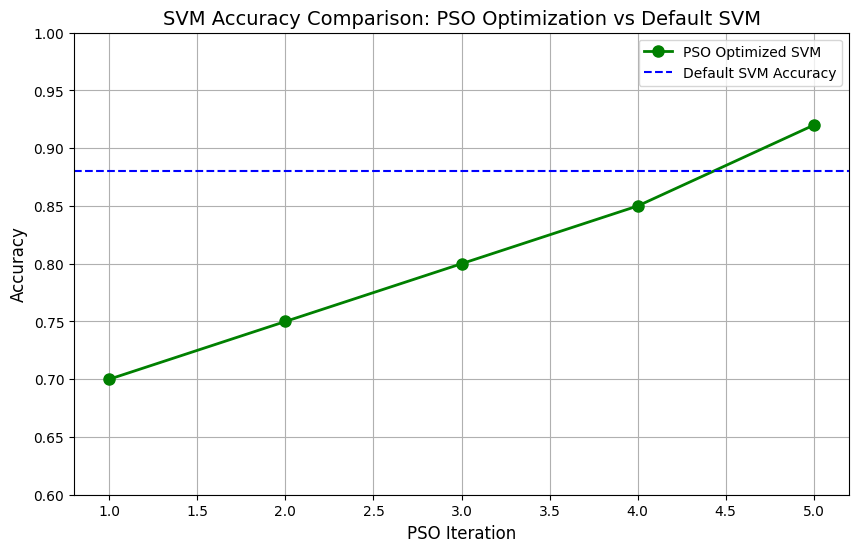

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: PSO iteration results (replace with actual data from your optimization)
pso_iterations = np.arange(1, 6)  # Iteration numbers
pso_accuracies = [0.70, 0.75, 0.80, 0.85, 0.92]  # Accuracies at each PSO iteration

# Default SVM accuracy (replace with actual accuracy)
default_svm_accuracy = 0.88

# Plotting PSO Optimization Progress
plt.figure(figsize=(10, 6))

# PSO accuracy over iterations (line plot)
plt.plot(pso_iterations, pso_accuracies, label='PSO Optimized SVM', marker='o', color='green', linestyle='-', linewidth=2, markersize=8)

# Default SVM accuracy (horizontal line)
plt.axhline(y=default_svm_accuracy, color='blue', linestyle='--', label='Default SVM Accuracy')

# Add labels and title
plt.title('SVM Accuracy Comparison: PSO Optimization vs Default SVM', fontsize=14)
plt.xlabel('PSO Iteration', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Set y-axis limits for better visualization
plt.ylim(0.6, 1.0)

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
